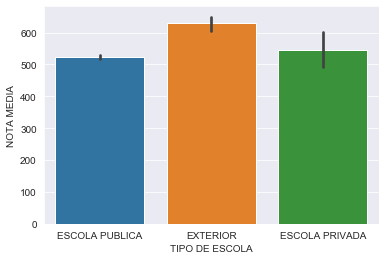

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colunasEnem = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','TP_ESCOLA']

enem = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep=";", encoding='ISO-8859-1', usecols= colunasEnem)

cnMedia = enem['NU_NOTA_CN'].mean()
cnMedia = round(cnMedia, 2)
enem.update(enem['NU_NOTA_CN'].fillna(cnMedia))

chMedia = enem['NU_NOTA_CH'].mean()
chMedia = round(chMedia, 2)
enem.update(enem['NU_NOTA_CH'].fillna(chMedia))

lcMedia = enem['NU_NOTA_LC'].mean()
lcMedia = round(lcMedia, 2)
enem.update(enem['NU_NOTA_LC'].fillna(lcMedia))

mtMedia = enem['NU_NOTA_MT'].mean()
mtMedia = round(mtMedia, 2)
enem.update(enem['NU_NOTA_MT'].fillna(mtMedia))

redMedia = enem['NU_NOTA_REDACAO'].mean()
redMedia = round(redMedia, 2)
enem.update(enem['NU_NOTA_REDACAO'].fillna(redMedia))

enem['NOTA MEDIA'] = (enem['NU_NOTA_CH'] + enem['NU_NOTA_LC'] + enem['NU_NOTA_MT'] + enem['NU_NOTA_CN'] + enem['NU_NOTA_REDACAO'])/5

enem.rename({'TP_ESCOLA':'TIPO DE ESCOLA'},inplace = True, axis='columns')

def tp_escola(num):
    if num == 1:
        return np.NaN
    if num == 2:
        return 'ESCOLA PUBLICA'
    if num == 3:
        return 'ESCOLA PRIVADA'
    if num == 4:
        return 'EXTERIOR'
enem['TIPO DE ESCOLA'] = enem['TIPO DE ESCOLA'].map(tp_escola)

sns.set_style('darkgrid')
sns.barplot(x='TIPO DE ESCOLA', y='NOTA MEDIA', data=enem)